In [1]:
import atac_networks

In [2]:
import numpy as np
import pandas as pd
import anndata as ad

import scipy as sp
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix

# Test with sparse covariance true matrix as GT

In [3]:
# Create fake single-cell atac-seq data
nb_cells = 300
nb_chr = 10
nb_regions_per_chr = 200
between_reg = 2000
size_reg = 50

counts = []
for chr in range(nb_chr):
    counts.append(pd.DataFrame(np.random.randint(0,100, size=(nb_cells, nb_regions_per_chr)),
                        index=['Cell_'+j for j in map(str, range(nb_cells))],
                        columns=['chr'+str(chr)+'_'+str(i)+'_'+str(i+size_reg) for i in range(1, nb_regions_per_chr*between_reg+1, between_reg)]))
atac = ad.AnnData(pd.concat(counts, axis=1))

In [4]:
distance_threshold = 50000

### 1/5 Add region position in AnnData.obs

In [5]:
atac_networks.add_region_infos(atac)

### Replace data with fake cov matrix

In [6]:
n_samples, n_features = 300, nb_regions_per_chr

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(
    n_features, alpha=0.99, smallest_coef=0.4, largest_coef=0.7, random_state=prng
)
cov = linalg.inv(prec)

#cov with only potential connections
possible_co = sp.sparse.csr_matrix(atac_networks.get_distances_regions(atac)<distance_threshold/2)[:cov.shape[0],:cov.shape[1]]
possible_co = sp.sparse.coo_matrix(possible_co).toarray() + sp.sparse.coo_matrix(possible_co).toarray().T 
cov = np.eye(len(cov))*np.diag(cov) + possible_co*cov 
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
X -= X.mean(axis=0)
X /= X.std(axis=0)

X_ = np.concatenate([X]*nb_chr, axis=1)
atac.X = X_

### 3/5 Calculate correlations (cov in fact)

In [11]:
final_score = atac_networks.sliding_graphical_lasso(
    atac,
    window_size=distance_threshold,
    unit_distance = 1000,
    distance_constraint=distance_threshold/2,
    n_samples=50,
    n_samples_maxtry=100,
    max_alpha_iteration=60
)

chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2219.80it/s]


chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2777.68it/s]


chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2236.37it/s]


chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2155.62it/s]


chr4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2223.18it/s]


chr5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1146.14it/s]


chr6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1275.45it/s]


chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1633.69it/s]


chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1992.78it/s]


chr9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2101.49it/s]


chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2640.21it/s]


chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2115.00it/s]


chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2254.09it/s]


chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1937.55it/s]


chr4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2047.00it/s]


chr5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2005.52it/s]


chr6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1569.36it/s]


chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1850.87it/s]


chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2582.90it/s]


chr9


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [00:08<00:08,  6.12it/s]


[0.95017766 0.90855168 0.81991458 0.51930407 0.71370247 0.87578879
 0.65790989 0.51930407 0.41436545 0.65790989 0.95017766 0.65790989
 0.61145747 0.55709817 0.41436545 0.93128626 0.90855168 0.51930407
 0.41436545 0.81991458 0.81991458 0.61145747 0.65790989 0.90855168
 0.87578879 0.61145747 0.61145747 0.55709817 0.71370247 0.57539436
 0.54909138 0.93128626 0.95017766 0.51930407 0.90855168 0.93128626
 0.61145747 0.41436545 0.51930407 0.95017766 0.54909138 0.95017766
 0.90855168 0.54909138 0.95017766 0.54909138 0.57539436 0.51930407
 0.54073556 0.51930407]
[0, 25000]
chr0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 281.32it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 256.93it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 271.01it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 313.22it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 323.49it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 307.82it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 312.92it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 223.19it/s]


[[ 1.00334448e+00 -2.25235752e-02 -2.50236813e-02  3.70828108e-02
  -7.79521135e-02 -4.20270882e-02 -7.83662096e-03  3.82664831e-02
  -3.93670117e-03  4.84784183e-02  6.09487897e-03 -2.39213111e-03
   3.57613761e-02  1.14231463e-01 -7.35857747e-02  3.23508771e-02
  -4.12927342e-03  6.78619212e-03 -1.83573972e-02 -1.01057151e-02
  -6.49752503e-02 -3.18716543e-02  9.38413679e-02  3.64590963e-02
  -5.22022047e-02]
 [-2.25235752e-02  1.00334448e+00 -7.03818914e-02 -1.16431884e-02
   8.72411871e-02  5.29455677e-02  8.38344533e-02 -3.45076089e-02
  -2.67535315e-02  4.10394179e-02 -1.10670532e-01 -7.79763379e-02
  -1.89022601e-02 -7.24147103e-03  8.70771283e-02 -2.26967114e-02
  -1.15385514e-02 -3.96355122e-02  5.93318352e-02 -7.73692172e-02
   6.33685323e-02 -6.17973714e-02 -2.06936302e-02  7.19312406e-02
  -7.14244828e-02]
 [-2.50236813e-02 -7.03818914e-02  1.00334448e+00 -4.55210867e-02
  -3.34469140e-02  1.12404994e-02 -2.03879270e-02  5.57503822e-02
   4.31784387e-02 -2.68926704e-02  5.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 252.11it/s]


[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 197.26it/s]


[[ 1.00334448e+00  9.85338302e-02  2.89479355e-02 -3.57590023e-02
   1.92366422e-02 -2.02117021e-02 -8.59457230e-02  5.58934949e-02
   1.27438332e-01  9.69636448e-02 -9.10491805e-02  5.16289976e-02
   1.03433150e-02  7.46254378e-03  6.62034381e-02 -4.45819312e-02
   1.76273020e-02 -1.09970940e-02 -1.30712302e-02 -8.30556254e-02
   2.83312182e-03 -2.22411693e-02 -3.14628356e-02 -5.61901775e-02
  -6.47063080e-02]
 [ 9.85338302e-02  1.00334448e+00  1.60601169e-02 -3.62424675e-02
  -1.02405571e-01  1.92600292e-02 -3.64314833e-02 -4.55463070e-02
   6.11516240e-02  7.92102611e-02 -1.03249520e-01  6.01597024e-02
  -4.49529906e-02 -1.62626584e-02 -4.97861435e-02 -4.55164104e-02
  -4.04816536e-02  3.62678250e-02 -7.44258220e-03  4.18030185e-02
   4.03092844e-02 -6.52650774e-02  5.44778164e-03 -1.02997691e-02
  -2.35268944e-02]
 [ 2.89479355e-02  1.60601169e-02  1.00334448e+00 -1.94434172e-02
  -1.95288449e-02  4.68614827e-02 -7.52064734e-03 -5.68485234e-02
  -6.11117811e-02 -4.24192713e-02  3.9

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 216.32it/s]


[[ 1.00334448e+00  4.00199571e-02  1.92533577e-02 -7.66308163e-02
   1.63727763e-02 -6.80782735e-02  3.77426521e-02 -1.85287755e-02
   2.83941381e-02  1.41878311e-02 -2.18797282e-02 -5.48407799e-02
  -8.18781989e-02  1.43401944e-02  3.20625402e-02 -9.94403341e-02
  -6.85474221e-02  1.69322508e-04  7.20302719e-04 -3.66939059e-02
   2.33117559e-02  3.30210799e-02 -5.42834136e-03  8.31946729e-02
   1.99718233e-03]
 [ 4.00199571e-02  1.00334448e+00  3.31965291e-02  2.76338559e-02
   6.04605905e-03 -1.23306155e-02 -1.45030566e-02  5.67231111e-02
   1.15595230e-01  6.84219098e-02  3.86274529e-02 -4.26612670e-02
  -8.44627715e-02 -3.39439735e-03  1.89233710e-02 -5.14446711e-02
  -4.15060293e-02  4.66677458e-02  4.29335000e-02 -5.18300690e-02
   4.86860496e-02  3.66225791e-02  1.15334503e-02 -2.19321066e-02
  -5.12086628e-02]
 [ 1.92533577e-02  3.31965291e-02  1.00334448e+00  9.94549923e-02
  -6.29293530e-02 -9.26401189e-02  4.23593908e-02 -2.21691557e-02
  -9.72203213e-02  8.02373205e-02  3.6

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 270.93it/s]


[[ 1.00334448e+00  1.21942086e-01  5.37693163e-03 -5.25069518e-03
   3.88306040e-02  5.00951031e-03 -7.86762027e-02  6.40852168e-02
  -7.28887795e-02  3.33711430e-02  1.70108836e-02  1.20156750e-01
   1.30309308e-01  4.22349356e-04  5.78383563e-02 -3.14548009e-02
  -4.45400291e-03  4.87930943e-02 -1.75234505e-03 -3.82406443e-02
   1.00751588e-01 -2.13707302e-03 -7.98983565e-03 -6.39830734e-02
  -1.75933094e-02]
 [ 1.21942086e-01  1.00334448e+00  1.19968769e-02  5.74167598e-02
  -9.55009648e-03  1.71442158e-02 -4.75722061e-02  2.81402477e-02
   8.44226755e-03  7.74817233e-02 -2.00339104e-02  2.45186224e-02
   8.03838300e-02 -2.10920395e-02  4.75583606e-02  2.58433449e-02
  -1.06218457e-02  1.33709974e-01  2.03447953e-02  1.69173885e-02
  -4.50354609e-02  5.48600306e-03  3.35790649e-02 -3.45866966e-02
  -2.95869379e-02]
 [ 5.37693163e-03  1.19968769e-02  1.00334448e+00  1.18259560e-01
  -1.49923663e-04  1.28313892e-01  9.19946959e-02  8.30979031e-02
  -1.97513619e-02 -2.96226745e-02  8.6

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 259.41it/s]


[[ 1.00334448e+00  1.21942086e-01  5.37693163e-03 -5.25069518e-03
   3.88306040e-02  5.00951031e-03 -7.86762027e-02  6.40852168e-02
  -7.28887795e-02  3.33711430e-02  1.70108836e-02  1.20156750e-01
   1.30309308e-01  4.22349356e-04  5.78383563e-02 -3.14548009e-02
  -4.45400291e-03  4.87930943e-02 -1.75234505e-03 -3.82406443e-02
   1.00751588e-01 -2.13707302e-03 -7.98983565e-03 -6.39830734e-02
  -1.75933094e-02]
 [ 1.21942086e-01  1.00334448e+00  1.19968769e-02  5.74167598e-02
  -9.55009648e-03  1.71442158e-02 -4.75722061e-02  2.81402477e-02
   8.44226755e-03  7.74817233e-02 -2.00339104e-02  2.45186224e-02
   8.03838300e-02 -2.10920395e-02  4.75583606e-02  2.58433449e-02
  -1.06218457e-02  1.33709974e-01  2.03447953e-02  1.69173885e-02
  -4.50354609e-02  5.48600306e-03  3.35790649e-02 -3.45866966e-02
  -2.95869379e-02]
 [ 5.37693163e-03  1.19968769e-02  1.00334448e+00  1.18259560e-01
  -1.49923663e-04  1.28313892e-01  9.19946959e-02  8.30979031e-02
  -1.97513619e-02 -2.96226745e-02  8.6

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.74it/s]


[[ 1.00334448e+00 -2.41225877e-02 -3.60375362e-02 -2.30552295e-02
   2.28957296e-03  2.02851924e-02 -6.35291757e-02 -1.08553621e-01
   1.62269809e-02 -5.43365953e-02  2.07237276e-02 -1.97917842e-02
   1.45150094e-02  2.82117263e-02  6.44308893e-02  9.33085096e-03
   9.17966042e-02  5.73500727e-02 -5.46361562e-02 -1.25862100e-01
  -1.59430574e-01  2.99727682e-03 -3.86225664e-02  3.50740298e-02
   8.91811308e-02]
 [-2.41225877e-02  1.00334448e+00  2.91571742e-01  1.26892828e-01
   3.22942414e-01 -5.21395030e-02  4.67757434e-03 -1.62816907e-02
  -1.90450651e-02  4.06564098e-02 -6.94249865e-02 -7.31120663e-02
   2.44866263e-02 -2.30419553e-02 -6.28872848e-03  1.08370733e-01
  -1.52664041e-02 -8.02399258e-02 -3.47221907e-02 -2.61747393e-02
   2.57355232e-03  6.27800533e-02 -4.28959900e-02 -6.60482736e-02
  -3.16701267e-02]
 [-3.60375362e-02  2.91571742e-01  1.00334448e+00  1.31372578e-01
   2.77573001e-01  2.28982024e-02  5.15675417e-02  1.51576041e-01
   5.52670527e-02 -3.90881869e-02 -2.3

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 224.00it/s]

[[ 1.00334448e+00  1.21942086e-01  5.37693163e-03 -5.25069518e-03
   3.88306040e-02  5.00951031e-03 -7.86762027e-02  6.40852168e-02
  -7.28887795e-02  3.33711430e-02  1.70108836e-02  1.20156750e-01
   1.30309308e-01  4.22349356e-04  5.78383563e-02 -3.14548009e-02
  -4.45400291e-03  4.87930943e-02 -1.75234505e-03 -3.82406443e-02
   1.00751588e-01 -2.13707302e-03 -7.98983565e-03 -6.39830734e-02
  -1.75933094e-02]
 [ 1.21942086e-01  1.00334448e+00  1.19968769e-02  5.74167598e-02
  -9.55009648e-03  1.71442158e-02 -4.75722061e-02  2.81402477e-02
   8.44226755e-03  7.74817233e-02 -2.00339104e-02  2.45186224e-02
   8.03838300e-02 -2.10920395e-02  4.75583606e-02  2.58433449e-02
  -1.06218457e-02  1.33709974e-01  2.03447953e-02  1.69173885e-02
  -4.50354609e-02  5.48600306e-03  3.35790649e-02 -3.45866966e-02
  -2.95869379e-02]
 [ 5.37693163e-03  1.19968769e-02  1.00334448e+00  1.18259560e-01
  -1.49923663e-04  1.28313892e-01  9.19946959e-02  8.30979031e-02
  -1.97513619e-02 -2.96226745e-02  8.6

[[0.         0.27311953 0.44579388 0.51124232 0.546786   0.56946559
  0.58534712 0.59716558 0.60634658 0.61371064 0.61976552 0.62484328]
 [0.28858401 0.         0.27311953 0.44579388 0.51124232 0.546786
  0.56946559 0.58534712 0.59716558 0.60634658 0.61371064 0.61976552]
 [0.45038977 0.28858401 0.         0.27311953 0.44579388 0.51124232
  0.546786   0.56946559 0.58534712 0.59716558 0.60634658 0.61371064]
 [0.51350269 0.45038977 0.28858401 0.         0.27311953 0.44579388
  0.51124232 0.546786   0.56946559 0.58534712 0.59716558 0.60634658]
 [0.54815224 0.51350269 0.45038977 0.28858401 0.         0.27311953
  0.44579388 0.51124232 0.546786   0.56946559 0.58534712 0.59716558]
 [0.57039013 0.54815224 0.51350269 0.45038977 0.28858401 0.
  0.27311953 0.44579388 0.51124232 0.546786   0.56946559 0.58534712]
 [0.5860191  0.57039013 0.54815224 0.51350269 0.45038977 0.28858401
  0.         0.27311953 0.44579388 0.51124232 0.546786   0.56946559]
 [0.59767868 0.5860191  0.57039013 0.54815224 0.513

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 193.94it/s]


[[ 1.00334448e+00  2.66007044e-02 -2.00615244e-02 -2.56921421e-02
  -4.62865941e-02  2.87313608e-02  1.68687572e-02  5.95020772e-02
  -6.69282447e-02  5.35274138e-02  8.42844234e-02 -1.27400107e-02
  -2.31320670e-02 -3.96178438e-04  2.84453581e-02  5.79607200e-02
   7.73261309e-02  2.45728132e-02  3.68979436e-02 -1.40233536e-02
  -3.50462285e-02 -7.82001002e-02  5.57049412e-02  1.33659716e-01
  -3.30093248e-02]
 [ 2.66007044e-02  1.00334448e+00  2.72476005e-02  6.04165920e-02
  -2.97588620e-02 -1.48582403e-02 -4.02976636e-02 -1.06583596e-02
   1.19671382e-02  1.43986605e-01  8.22813287e-02  6.21559441e-02
   6.61462060e-02 -7.77416327e-02  1.60833379e-02 -7.38987653e-02
   8.59247055e-03  5.90272493e-02 -8.26207167e-02  1.62656538e-02
   2.39551966e-02 -1.45637186e-02 -1.18137189e-01 -1.01638259e-02
  -2.83965059e-02]
 [-2.00615244e-02  2.72476005e-02  1.00334448e+00  2.87297595e-02
   9.26783654e-02  3.53069843e-02  1.36359661e-01 -4.60739106e-02
   2.60358482e-02 -1.58542172e-02 -4.8

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 216.96it/s]


[[ 1.00334448e+00 -2.41225877e-02 -3.60375362e-02 -2.30552295e-02
   2.28957296e-03  2.02851924e-02 -6.35291757e-02 -1.08553621e-01
   1.62269809e-02 -5.43365953e-02  2.07237276e-02 -1.97917842e-02
   1.45150094e-02  2.82117263e-02  6.44308893e-02  9.33085096e-03
   9.17966042e-02  5.73500727e-02 -5.46361562e-02 -1.25862100e-01
  -1.59430574e-01  2.99727682e-03 -3.86225664e-02  3.50740298e-02
   8.91811308e-02]
 [-2.41225877e-02  1.00334448e+00  2.91571742e-01  1.26892828e-01
   3.22942414e-01 -5.21395030e-02  4.67757434e-03 -1.62816907e-02
  -1.90450651e-02  4.06564098e-02 -6.94249865e-02 -7.31120663e-02
   2.44866263e-02 -2.30419553e-02 -6.28872848e-03  1.08370733e-01
  -1.52664041e-02 -8.02399258e-02 -3.47221907e-02 -2.61747393e-02
   2.57355232e-03  6.27800533e-02 -4.28959900e-02 -6.60482736e-02
  -3.16701267e-02]
 [-3.60375362e-02  2.91571742e-01  1.00334448e+00  1.31372578e-01
   2.77573001e-01  2.28982024e-02  5.15675417e-02  1.51576041e-01
   5.52670527e-02 -3.90881869e-02 -2.3

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 220.00it/s]


[[ 1.00334448e+00  4.00199571e-02  1.92533577e-02 -7.66308163e-02
   1.63727763e-02 -6.80782735e-02  3.77426521e-02 -1.85287755e-02
   2.83941381e-02  1.41878311e-02 -2.18797282e-02 -5.48407799e-02
  -8.18781989e-02  1.43401944e-02  3.20625402e-02 -9.94403341e-02
  -6.85474221e-02  1.69322508e-04  7.20302719e-04 -3.66939059e-02
   2.33117559e-02  3.30210799e-02 -5.42834136e-03  8.31946729e-02
   1.99718233e-03]
 [ 4.00199571e-02  1.00334448e+00  3.31965291e-02  2.76338559e-02
   6.04605905e-03 -1.23306155e-02 -1.45030566e-02  5.67231111e-02
   1.15595230e-01  6.84219098e-02  3.86274529e-02 -4.26612670e-02
  -8.44627715e-02 -3.39439735e-03  1.89233710e-02 -5.14446711e-02
  -4.15060293e-02  4.66677458e-02  4.29335000e-02 -5.18300690e-02
   4.86860496e-02  3.66225791e-02  1.15334503e-02 -2.19321066e-02
  -5.12086628e-02]
 [ 1.92533577e-02  3.31965291e-02  1.00334448e+00  9.94549923e-02
  -6.29293530e-02 -9.26401189e-02  4.23593908e-02 -2.21691557e-02
  -9.72203213e-02  8.02373205e-02  3.6

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 205.97it/s]


[[0.         0.27311953 0.44579388 0.51124232 0.546786   0.56946559
  0.58534712 0.59716558 0.60634658 0.61371064 0.61976552 0.62484328]
 [0.28858401 0.         0.27311953 0.44579388 0.51124232 0.546786
  0.56946559 0.58534712 0.59716558 0.60634658 0.61371064 0.61976552]
 [0.45038977 0.28858401 0.         0.27311953 0.44579388 0.51124232
  0.546786   0.56946559 0.58534712 0.59716558 0.60634658 0.61371064]
 [0.51350269 0.45038977 0.28858401 0.         0.27311953 0.44579388
  0.51124232 0.546786   0.56946559 0.58534712 0.59716558 0.60634658]
 [0.54815224 0.51350269 0.45038977 0.28858401 0.         0.27311953
  0.44579388 0.51124232 0.546786   0.56946559 0.58534712 0.59716558]
 [0.57039013 0.54815224 0.51350269 0.45038977 0.28858401 0.
  0.27311953 0.44579388 0.51124232 0.546786   0.56946559 0.58534712]
 [0.5860191  0.57039013 0.54815224 0.51350269 0.45038977 0.28858401
  0.         0.27311953 0.44579388 0.51124232 0.546786   0.56946559]
 [0.59767868 0.5860191  0.57039013 0.54815224 0.513

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 233.98it/s]

[[ 1.00334448e+00 -8.58324755e-03  1.70253134e-03 -4.57665107e-02
   2.12144046e-02  5.70115113e-02  4.77155585e-02 -7.40530611e-02
   3.71241280e-02  7.20459083e-02 -2.03917173e-02  3.85679845e-02]
 [-8.58324755e-03  1.00334448e+00  1.83273147e-02  5.42809691e-03
  -4.81821993e-02 -3.05131827e-03  1.58938589e-02  7.81492964e-02
  -6.81231121e-02  4.70856006e-02 -3.36759962e-02  2.47103673e-02]
 [ 1.70253134e-03  1.83273147e-02  1.00334448e+00  1.40425745e-01
   4.03299873e-02  2.85726444e-02  1.95435421e-02  2.45773725e-02
   5.32939195e-02 -6.13235424e-02 -7.41718879e-02 -4.93020230e-02]
 [-4.57665107e-02  5.42809691e-03  1.40425745e-01  1.00334448e+00
  -3.22675916e-02 -3.02211479e-02 -8.99141204e-03 -5.14040119e-02
  -7.59435784e-02 -1.47508801e-02  1.10560130e-01 -3.04447166e-02]
 [ 2.12144046e-02 -4.81821993e-02  4.03299873e-02 -3.22675916e-02
   1.00334448e+00  7.65272751e-02 -1.25702073e-02 -2.27566252e-02
   6.65129412e-02 -5.22980372e-02  3.56334511e-02 -9.60133179e-02]
 [ 5.

In [11]:
distance = atac_networks.get_distances_regions(atac)

In [16]:
atac_networks.average_alpha(
    atac,
    window_size=distance_threshold,
    unit_distance = 1000,
    distance_constraint=distance_threshold/2,
    n_samples=50,
    n_samples_maxtry=100,
    max_alpha_iteration=60)
                            

chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1229.78it/s]


chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1253.11it/s]


chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2619.80it/s]


chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1632.42it/s]


chr4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1792.44it/s]


chr5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1033.56it/s]


chr6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 959.58it/s]


chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2426.91it/s]


chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1777.53it/s]


chr9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1705.61it/s]


chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1806.53it/s]


chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1855.58it/s]


chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2036.94it/s]


chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2761.45it/s]


chr4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 999.24it/s]


chr5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2694.27it/s]


chr6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2458.56it/s]


chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2533.94it/s]


chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1294.64it/s]


chr9


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [00:09<00:08,  5.87it/s]

[0.61145747 0.54909138 0.81991458 0.65790989 0.81991458 0.90855168
 0.95017766 0.54909138 0.90855168 0.87578879 0.87578879 0.95017766
 0.51930407 0.41436545 0.61145747 0.95017766 0.54909138 0.44109813
 0.51930407 0.61145747 0.44109813 0.61145747 0.41436545 0.65790989
 0.87578879 0.93128626 0.57539436 0.65790989 0.71370247 0.81991458
 0.95017766 0.71370247 0.95017766 0.61145747 0.93128626 0.54909138
 0.44109813 0.54073556 0.54909138 0.65790989 0.54909138 0.55709817
 0.81991458 0.95017766 0.90855168 0.95017766 0.90855168 0.55709817
 0.87578879 0.54073556]


0.7060682353010113

In [49]:
def sliding_graphical_lasso(
    AnnData,
    window_size: int = 500_000,
    unit_distance=1_000,
    distance_constraint=250_000,
    s=0.75,
    max_alpha_iteration=100,
    distance_parameter_convergence=1e-22,
    max_elements=200,
    n_samples=100,
    n_samples_maxtry=500,
):
    """
    Extract sliding submatrix from a sparse correlation matrix.

    WARNING: might look generalised for many overlaps but is not yet at the
    end, that's why 'start_sliding' is hard coded as list of 2 values.
    """
    alpha = average_alpha(
        AnnData,
        window_size=window_size,
        unit_distance=unit_distance,
        n_samples=n_samples,
        n_samples_maxtry=n_samples_maxtry,
        max_alpha_iteration=max_alpha_iteration,
        s=s,
        distance_constraint=distance_constraint,
        distance_parameter_convergence=distance_parameter_convergence,
        max_elements=max_elements,
    )
    alpha = 0.14
    start_slidings = [0, int(window_size / 2)]
    print(start_slidings)

    results = {}
    regions_list = AnnData.var_names
    # Get global indices of regions
    map_indices = {regions_list[i]: i for i in range(len(regions_list))}

    for k in start_slidings:
        slide_results = {}
        slide_results["scores"] = np.array([])
        slide_results["idx"] = np.array([])
        slide_results["idy"] = np.array([])

        for chromosome in AnnData.var["chromosome"].unique():
            print(chromosome)
            # Get start positions of windows
            window_starts = [
                i
                for i in range(
                    k,
                    AnnData.var["end"][
                        AnnData.var["chromosome"] == chromosome].max(),
                    window_size,
                )
            ]

            for start in tqdm.tqdm(window_starts):
                end = start + window_size
                # Get global indices of regions in the window
                idx = np.where(
                    (AnnData.var["chromosome"] == chromosome)
                    & (AnnData.var["start"] >= start)
                    & (AnnData.var["start"] <= end)
                )[0]

                # already global ?
                # Get global indices of regions in the window
                # idx = [map_indices[i] for i in regions_list[idx]]

                # Get submatrix
                window_accessibility = AnnData.X[:, idx]
                window_scores = np.cov(window_accessibility, rowvar=False)
                print(window_scores)
                window_scores = window_scores + 1e-4 * np.eye(
                    len(window_scores))

                distance = get_distances_regions(AnnData[:, idx])
                # Test if distance is negative
                if np.any(distance < 0):
                    raise ValueError(
                        """
                                     Distance between regions should be
                                     positive. You might have overlapping
                                     regions.
                                     """
                    )

                window_penalties = calc_penalty(
                    alpha,
                    distance=distance,
                    unit_distance=unit_distance)

                # Initiating graphical lasso
                graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(
                    init_method="precomputed", lam=window_penalties
                )

                # Fit graphical lasso
                graph_lasso_model.fit(window_scores)

                # Names of regions in the window
                window_region_names = AnnData.var_names[idx].copy()

                # convert to sparse matrix the results
                corrected_scores = sp.sparse.coo_matrix(
                    graph_lasso_model.covariance_)

                # Convert corrected_scores column
                # and row indices to global indices
                idx = [
                    map_indices[name]
                    for name in window_region_names[corrected_scores.row]
                ]
                idy = [
                    map_indices[name]
                    for name in window_region_names[corrected_scores.col]
                ]

                # Add the "sub" resuls to the global sparse matrix
                slide_results["scores"] = np.concatenate(
                    [slide_results["scores"], corrected_scores.data]
                )
                slide_results["idx"] = np.concatenate(
                    [slide_results["idx"], idx]
                    )
                slide_results["idy"] = np.concatenate(
                    [slide_results["idy"], idy]
                    )

            print(
                window_penalties,
                slide_results["scores"].sum(),
                corrected_scores.data.sum(),
            )

            # Create sparse matrix
            results["window_" + str(k)] = sp.sparse.coo_matrix(
                (slide_results["scores"],
                 (slide_results["idx"], slide_results["idy"])),
                shape=(AnnData.X.shape[1], AnnData.X.shape[1]),
            )

    sliding_keys = ["window_" + str(k) for k in start_slidings]

    k_positive_coords = []
    k_negative_coords = []
    for k in sliding_keys:
        print(results[k].row)
        k_positive_coords.append(
            {
                (x, y)
                for x, y, d in zip(
                    results[k].row,
                    results[k].col,
                    results[k].data)
                if d >= 0
            }
        )
        k_negative_coords.append(
            {
                (x, y)
                for x, y, d in zip(
                    results[k].row,
                    results[k].col,
                    results[k].data)
                if d <= 0
            }
        )

    # Get shared positive and negative coordinates intersection
    positive_coords = set.intersection(*k_positive_coords)
    negative_coords = set.intersection(*k_negative_coords)

    # Shared and same sign coordinates
    coords = pd.DataFrame(
        set.union(negative_coords, positive_coords), columns=["row", "col"]
    )

    # Add common signe values
    average = [
        sp.sparse.csr_matrix(
            (
                sp.sparse.csr_matrix(
                    sp.sparse.csr_matrix(results[k])[coords["row"],
                                                     coords["col"]]
                ).data,
                (coords["row"], coords["col"]),
            ),
            shape=results[k].shape,
        )
        for k in sliding_keys[:]
    ]

    average = reduce(lambda x, y: x + y, average)

    # Divide for mean value
    average = average / len(sliding_keys)

    # Add uni-measurement values
    # Get all shared coordinates
    l_all_coords = []
    for k in sliding_keys:
        print(k, sp.sparse.csr_matrix(results[k])[1, 1])
        l_all_coords.append(
            {(x, y) for x, y, d in zip(
                results[k].row,
                results[k].col,
                results[k].data)}
        )
    all_coords = set.intersection(*l_all_coords)

    for k in sliding_keys:
        # get all coordinates in a set
        k_coords = {
            (x, y) for x, y, d in zip(
                results[k].row,
                results[k].col,
                results[k].data)
        }
        # Substract all shared coordinates to this set
        k_coords = pd.DataFrame(
            k_coords.difference(all_coords),
            columns=["row", "col"])

        # Add values to the results
        k_single = sp.sparse.csr_matrix(
            (
                sp.sparse.csr_matrix(  # csr_matrix to re-store as sparse
                    # since accessed by coordinates might return unsparsed
                    sp.sparse.csr_matrix(  # csr_matrix to access by coords
                        results[k])[k_coords["row"], k_coords["col"]]
                ).data,
                (k_coords["row"], k_coords["col"]),
            ),
            shape=results[k].shape,
        )

        average = average + k_single

    # FIX/ADD Add a way of handling value with non maximal number of overlap
    # if more than 1 overlap with the windows

    return sp.sparse.coo_matrix(average)


In [50]:
import tqdm
from functools import reduce
import atac_networks.quic_graph_lasso as quic_graph_lasso
final_score = sliding_graphical_lasso(
    atac,
    window_size=distance_threshold,
    unit_distance = 1000,
    distance_constraint=distance_threshold/2,
    n_samples=5,
    n_samples_maxtry=5,
    max_alpha_iteration=1
)

chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1721.53it/s]


chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2846.97it/s]


chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2208.84it/s]


chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2049.63it/s]


chr4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2051.26it/s]


chr5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1228.88it/s]


chr6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1958.58it/s]


chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1515.97it/s]


chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1645.95it/s]


chr9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2281.68it/s]


chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1063.77it/s]


chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1667.72it/s]


chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2146.25it/s]


chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2284.95it/s]


chr4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1484.32it/s]


chr5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 990.13it/s]


chr6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1812.87it/s]


chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1647.73it/s]


chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1398.04it/s]


chr9


  0%|                                                                                                                                                                            | 0/5 [00:00<?, ?it/s]

maximum number of iterations hit
maximum number of iterations hit
maximum number of iterations hit
maximum number of iterations hit


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 336.90it/s]


maximum number of iterations hit
[1.5 1.5 1.5 1.5 1.5]
[0, 25000]
chr0


  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 162.71it/s]


[[ 1.00334448e+00  9.85338302e-02  2.89479355e-02 -3.57590023e-02
   1.92366422e-02 -2.02117021e-02 -8.59457230e-02  5.58934949e-02
   1.27438332e-01  9.69636448e-02 -9.10491805e-02  5.16289976e-02
   1.03433150e-02  7.46254378e-03  6.62034381e-02 -4.45819312e-02
   1.76273020e-02 -1.09970940e-02 -1.30712302e-02 -8.30556254e-02
   2.83312182e-03 -2.22411693e-02 -3.14628356e-02 -5.61901775e-02
  -6.47063080e-02]
 [ 9.85338302e-02  1.00334448e+00  1.60601169e-02 -3.62424675e-02
  -1.02405571e-01  1.92600292e-02 -3.64314833e-02 -4.55463070e-02
   6.11516240e-02  7.92102611e-02 -1.03249520e-01  6.01597024e-02
  -4.49529906e-02 -1.62626584e-02 -4.97861435e-02 -4.55164104e-02
  -4.04816536e-02  3.62678250e-02 -7.44258220e-03  4.18030185e-02
   4.03092844e-02 -6.52650774e-02  5.44778164e-03 -1.02997691e-02
  -2.35268944e-02]
 [ 2.89479355e-02  1.60601169e-02  1.00334448e+00 -1.94434172e-02
  -1.95288449e-02  4.68614827e-02 -7.52064734e-03 -5.68485234e-02
  -6.11117811e-02 -4.24192713e-02  3.9

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 195.36it/s]


[[ 1.00334448e+00  9.85338302e-02  2.89479355e-02 -3.57590023e-02
   1.92366422e-02 -2.02117021e-02 -8.59457230e-02  5.58934949e-02
   1.27438332e-01  9.69636448e-02 -9.10491805e-02  5.16289976e-02
   1.03433150e-02  7.46254378e-03  6.62034381e-02 -4.45819312e-02
   1.76273020e-02 -1.09970940e-02 -1.30712302e-02 -8.30556254e-02
   2.83312182e-03 -2.22411693e-02 -3.14628356e-02 -5.61901775e-02
  -6.47063080e-02]
 [ 9.85338302e-02  1.00334448e+00  1.60601169e-02 -3.62424675e-02
  -1.02405571e-01  1.92600292e-02 -3.64314833e-02 -4.55463070e-02
   6.11516240e-02  7.92102611e-02 -1.03249520e-01  6.01597024e-02
  -4.49529906e-02 -1.62626584e-02 -4.97861435e-02 -4.55164104e-02
  -4.04816536e-02  3.62678250e-02 -7.44258220e-03  4.18030185e-02
   4.03092844e-02 -6.52650774e-02  5.44778164e-03 -1.02997691e-02
  -2.35268944e-02]
 [ 2.89479355e-02  1.60601169e-02  1.00334448e+00 -1.94434172e-02
  -1.95288449e-02  4.68614827e-02 -7.52064734e-03 -5.68485234e-02
  -6.11117811e-02 -4.24192713e-02  3.9

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 189.35it/s]


[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945
  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223 0.13004599
  0.13046427 0.13084372 0.13118971 0.13150665 0.13179821 0.13206743
  0.1323169 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899
  0.1261945  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223
  0.13004599 0.13046427 0.13084372 0.13118971 0.13150665 0.13179821
  0.13206743]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613
  0.12516899 0.1261945  0.1270685  0.12782343 0.12848294 0.12906471
  0.12958223 0.13004599 0.13046427 0.13084372 0.13118971 0.13150665
  0.13179821]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887
  0.123

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 225.88it/s]


[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945
  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223 0.13004599
  0.13046427 0.13084372 0.13118971 0.13150665 0.13179821 0.13206743
  0.1323169 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899
  0.1261945  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223
  0.13004599 0.13046427 0.13084372 0.13118971 0.13150665 0.13179821
  0.13206743]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613
  0.12516899 0.1261945  0.1270685  0.12782343 0.12848294 0.12906471
  0.12958223 0.13004599 0.13046427 0.13084372 0.13118971 0.13150665
  0.13179821]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887
  0.123

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.81it/s]


[[ 1.00334448e+00  1.54578367e-02  1.26261304e-02  3.90976380e-02
  -6.13556621e-02  1.35344469e-02  1.13474701e-01 -4.26115733e-02
   3.53915064e-02  1.05510889e-01 -2.69315913e-02  2.88157589e-02
   1.35938297e-01  6.14427459e-03  6.45779960e-02 -1.09803016e-01
   6.87417458e-02  4.28825964e-02  9.07024898e-02 -3.05341669e-02
  -8.25995966e-03 -3.83004120e-03  8.59329131e-03 -6.08871846e-03
   3.15892403e-03]
 [ 1.54578367e-02  1.00334448e+00 -2.08251959e-02  4.49141147e-02
  -1.18628774e-01  7.29816767e-02  1.17426487e-04  5.88070047e-02
   4.63298927e-02  8.59609327e-03  1.23655524e-02 -2.36312845e-02
   1.72804552e-02  9.75647119e-02  5.45240806e-03  5.01240127e-03
   6.27548475e-03  1.88046244e-02 -3.75443429e-02  3.94617217e-02
   7.29746669e-03 -7.04360177e-02 -1.91471679e-02 -1.77365656e-02
   2.81301755e-02]
 [ 1.26261304e-02 -2.08251959e-02  1.00334448e+00  5.56272482e-03
  -6.00836506e-03 -4.40063851e-02  6.48385219e-02 -6.25029156e-02
   7.98354135e-02  6.75991962e-02 -3.3

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.84it/s]


[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945
  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223 0.13004599
  0.13046427 0.13084372 0.13118971 0.13150665 0.13179821 0.13206743
  0.1323169 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899
  0.1261945  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223
  0.13004599 0.13046427 0.13084372 0.13118971 0.13150665 0.13179821
  0.13206743]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613
  0.12516899 0.1261945  0.1270685  0.12782343 0.12848294 0.12906471
  0.12958223 0.13004599 0.13046427 0.13084372 0.13118971 0.13150665
  0.13179821]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887
  0.123

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 194.11it/s]


[[ 1.00334448e+00  1.54578367e-02  1.26261304e-02  3.90976380e-02
  -6.13556621e-02  1.35344469e-02  1.13474701e-01 -4.26115733e-02
   3.53915064e-02  1.05510889e-01 -2.69315913e-02  2.88157589e-02
   1.35938297e-01  6.14427459e-03  6.45779960e-02 -1.09803016e-01
   6.87417458e-02  4.28825964e-02  9.07024898e-02 -3.05341669e-02
  -8.25995966e-03 -3.83004120e-03  8.59329131e-03 -6.08871846e-03
   3.15892403e-03]
 [ 1.54578367e-02  1.00334448e+00 -2.08251959e-02  4.49141147e-02
  -1.18628774e-01  7.29816767e-02  1.17426487e-04  5.88070047e-02
   4.63298927e-02  8.59609327e-03  1.23655524e-02 -2.36312845e-02
   1.72804552e-02  9.75647119e-02  5.45240806e-03  5.01240127e-03
   6.27548475e-03  1.88046244e-02 -3.75443429e-02  3.94617217e-02
   7.29746669e-03 -7.04360177e-02 -1.91471679e-02 -1.77365656e-02
   2.81301755e-02]
 [ 1.26261304e-02 -2.08251959e-02  1.00334448e+00  5.56272482e-03
  -6.00836506e-03 -4.40063851e-02  6.48385219e-02 -6.25029156e-02
   7.98354135e-02  6.75991962e-02 -3.3

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 222.11it/s]

[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945
  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223 0.13004599
  0.13046427 0.13084372 0.13118971 0.13150665 0.13179821 0.13206743
  0.1323169 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899
  0.1261945  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223
  0.13004599 0.13046427 0.13084372 0.13118971 0.13150665 0.13179821
  0.13206743]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613
  0.12516899 0.1261945  0.1270685  0.12782343 0.12848294 0.12906471
  0.12958223 0.13004599 0.13046427 0.13084372 0.13118971 0.13150665
  0.13179821]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887
  0.123

chr8


  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 223.47it/s]


[[ 1.00334448e+00  1.54578367e-02  1.26261304e-02  3.90976380e-02
  -6.13556621e-02  1.35344469e-02  1.13474701e-01 -4.26115733e-02
   3.53915064e-02  1.05510889e-01 -2.69315913e-02  2.88157589e-02
   1.35938297e-01  6.14427459e-03  6.45779960e-02 -1.09803016e-01
   6.87417458e-02  4.28825964e-02  9.07024898e-02 -3.05341669e-02
  -8.25995966e-03 -3.83004120e-03  8.59329131e-03 -6.08871846e-03
   3.15892403e-03]
 [ 1.54578367e-02  1.00334448e+00 -2.08251959e-02  4.49141147e-02
  -1.18628774e-01  7.29816767e-02  1.17426487e-04  5.88070047e-02
   4.63298927e-02  8.59609327e-03  1.23655524e-02 -2.36312845e-02
   1.72804552e-02  9.75647119e-02  5.45240806e-03  5.01240127e-03
   6.27548475e-03  1.88046244e-02 -3.75443429e-02  3.94617217e-02
   7.29746669e-03 -7.04360177e-02 -1.91471679e-02 -1.77365656e-02
   2.81301755e-02]
 [ 1.26261304e-02 -2.08251959e-02  1.00334448e+00  5.56272482e-03
  -6.00836506e-03 -4.40063851e-02  6.48385219e-02 -6.25029156e-02
   7.98354135e-02  6.75991962e-02 -3.3

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  3.19699241e-02 -6.65068144e-03 -4.09495792e-02
  -3.80388986e-02 -1.20655488e-02 -4.00774883e-02 -3.11055899e-02
  -3.42526272e-02  2.78105213e-02 -8.90277103e-03 -1.40766983e-02
   2.99173478e-02 -6.82585415e-02  9.83283670e-02  6.64504670e-03
   5.74077773e-03  7.88072875e-02  4.89657713e-02 -2.03144992e-02
   2.22603508e-02  4.60774985e-02  3.42368733e-02  9.94844655e-02
   5.81802063e-03]
 [ 3.19699241e-02  1.00334448e+00  8.99480279e-02  4.69379177e-02
  -1.54639465e-02 -6.93725120e-02 -4.53114585e-03  1.34092516e-02
   1.88130907e-02  2.94981712e-02  3.80432286e-02  1.14072689e-02
  -1.11457234e-01  5.71406029e-02 -3.84331890e-02 -2.93005458e-02
   8.41031383e-02  2.44647996e-02  1.02020972e-01 -1.75027933e-02
   4.21452733e-03  5.50969853e-02  2.16378039e-02 -2.68193192e-02
  -1.52876107e-01]
 [-6.65068144e-03  8.99480279e-02  1.00334448e+00 -3.29133661e-02
   2.83856009e-02  2.84520639e-02 -4.08541498e-03  1.06108722e-01
  -4.31122132e-03 -1.13555390e-01  1.5

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 181.41it/s]

[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945
  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223 0.13004599
  0.13046427 0.13084372 0.13118971 0.13150665 0.13179821 0.13206743
  0.1323169 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899
  0.1261945  0.1270685  0.12782343 0.12848294 0.12906471 0.12958223
  0.13004599 0.13046427 0.13084372 0.13118971 0.13150665 0.13179821
  0.13206743]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613
  0.12516899 0.1261945  0.1270685  0.12782343 0.12848294 0.12906471
  0.12958223 0.13004599 0.13046427 0.13084372 0.13118971 0.13150665
  0.13179821]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887
  0.123


  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 198.05it/s]


[[ 1.00334448e+00 -8.58324755e-03  1.70253134e-03 -4.57665107e-02
   2.12144046e-02  5.70115113e-02  4.77155585e-02 -7.40530611e-02
   3.71241280e-02  7.20459083e-02 -2.03917173e-02  3.85679845e-02]
 [-8.58324755e-03  1.00334448e+00  1.83273147e-02  5.42809691e-03
  -4.81821993e-02 -3.05131827e-03  1.58938589e-02  7.81492964e-02
  -6.81231121e-02  4.70856006e-02 -3.36759962e-02  2.47103673e-02]
 [ 1.70253134e-03  1.83273147e-02  1.00334448e+00  1.40425745e-01
   4.03299873e-02  2.85726444e-02  1.95435421e-02  2.45773725e-02
   5.32939195e-02 -6.13235424e-02 -7.41718879e-02 -4.93020230e-02]
 [-4.57665107e-02  5.42809691e-03  1.40425745e-01  1.00334448e+00
  -3.22675916e-02 -3.02211479e-02 -8.99141204e-03 -5.14040119e-02
  -7.59435784e-02 -1.47508801e-02  1.10560130e-01 -3.04447166e-02]
 [ 2.12144046e-02 -4.81821993e-02  4.03299873e-02 -3.22675916e-02
   1.00334448e+00  7.65272751e-02 -1.25702073e-02 -2.27566252e-02
   6.65129412e-02 -5.22980372e-02  3.56334511e-02 -9.60133179e-02]
 [ 5.

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.56it/s]

[[ 1.00334448e+00 -7.72760344e-02 -2.94424118e-02 -1.23017515e-01
  -4.26252888e-02  8.31311631e-03 -3.46087029e-02 -9.99446543e-02
   3.31162482e-03 -5.45840976e-02  5.10497157e-02 -9.69524592e-02
  -5.21765897e-02 -1.21512539e-02  1.22452070e-02  4.84406516e-02
   8.75401787e-02  2.33663376e-02 -1.37682772e-02  1.88219909e-02
   6.12077368e-02 -3.00336063e-02 -4.33082973e-02 -1.75150196e-02
  -1.27453996e-02]
 [-7.72760344e-02  1.00334448e+00 -5.88062641e-02 -7.49241240e-03
   6.18235311e-02 -5.98843189e-03  8.38489630e-02  5.88085910e-03
  -7.61322367e-02 -5.72782276e-02 -5.08638163e-02 -2.16840380e-02
  -3.97864427e-02  1.10560583e-02 -1.12028227e-01  6.92517122e-02
   3.30457518e-02  3.35599009e-03 -1.21261900e-02  1.01920350e-01
  -2.32343316e-02 -1.01326726e-02 -7.89951623e-02  5.09109516e-02
  -1.65915743e-02]
 [-2.94424118e-02 -5.88062641e-02  1.00334448e+00  1.02608141e-01
  -4.71358817e-02  1.18045943e-02  8.62997375e-02 -3.12682039e-02
  -5.66316417e-02 -3.41041933e-02 -2.6


  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 203.93it/s]


[[ 1.00334448e+00 -7.72760344e-02 -2.94424118e-02 -1.23017515e-01
  -4.26252888e-02  8.31311631e-03 -3.46087029e-02 -9.99446543e-02
   3.31162482e-03 -5.45840976e-02  5.10497157e-02 -9.69524592e-02
  -5.21765897e-02 -1.21512539e-02  1.22452070e-02  4.84406516e-02
   8.75401787e-02  2.33663376e-02 -1.37682772e-02  1.88219909e-02
   6.12077368e-02 -3.00336063e-02 -4.33082973e-02 -1.75150196e-02
  -1.27453996e-02]
 [-7.72760344e-02  1.00334448e+00 -5.88062641e-02 -7.49241240e-03
   6.18235311e-02 -5.98843189e-03  8.38489630e-02  5.88085910e-03
  -7.61322367e-02 -5.72782276e-02 -5.08638163e-02 -2.16840380e-02
  -3.97864427e-02  1.10560583e-02 -1.12028227e-01  6.92517122e-02
   3.30457518e-02  3.35599009e-03 -1.21261900e-02  1.01920350e-01
  -2.32343316e-02 -1.01326726e-02 -7.89951623e-02  5.09109516e-02
  -1.65915743e-02]
 [-2.94424118e-02 -5.88062641e-02  1.00334448e+00  1.02608141e-01
  -4.71358817e-02  1.18045943e-02  8.62997375e-02 -3.12682039e-02
  -5.66316417e-02 -3.41041933e-02 -2.6

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.93it/s]


[[ 1.00334448e+00 -8.58324755e-03  1.70253134e-03 -4.57665107e-02
   2.12144046e-02  5.70115113e-02  4.77155585e-02 -7.40530611e-02
   3.71241280e-02  7.20459083e-02 -2.03917173e-02  3.85679845e-02]
 [-8.58324755e-03  1.00334448e+00  1.83273147e-02  5.42809691e-03
  -4.81821993e-02 -3.05131827e-03  1.58938589e-02  7.81492964e-02
  -6.81231121e-02  4.70856006e-02 -3.36759962e-02  2.47103673e-02]
 [ 1.70253134e-03  1.83273147e-02  1.00334448e+00  1.40425745e-01
   4.03299873e-02  2.85726444e-02  1.95435421e-02  2.45773725e-02
   5.32939195e-02 -6.13235424e-02 -7.41718879e-02 -4.93020230e-02]
 [-4.57665107e-02  5.42809691e-03  1.40425745e-01  1.00334448e+00
  -3.22675916e-02 -3.02211479e-02 -8.99141204e-03 -5.14040119e-02
  -7.59435784e-02 -1.47508801e-02  1.10560130e-01 -3.04447166e-02]
 [ 2.12144046e-02 -4.81821993e-02  4.03299873e-02 -3.22675916e-02
   1.00334448e+00  7.65272751e-02 -1.25702073e-02 -2.27566252e-02
   6.65129412e-02 -5.22980372e-02  3.56334511e-02 -9.60133179e-02]
 [ 5.

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 207.48it/s]


[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887]
 [0.11070583 0.10370795 0.09096155 0.05828296 0.         0.05515972
  0.09003335 0.10325144 0.11042991 0.11501032 0.11821778 0.12060466]
 [0.11519704 0.11070583 0.10370795 0.09096155 0.05828296 0.
  0.05515972 0.09003335 0.10325144 0.11042991 0.11501032 0.11821778]
 [0.1183535  0.11519704 0.11070583 0.10370795 0.09096155 0.05828296
  0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032]
 [0.12070829 0.1183535  0.11519704 0.11070583 0.1

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 234.16it/s]

[[ 1.00334448e+00 -7.72760344e-02 -2.94424118e-02 -1.23017515e-01
  -4.26252888e-02  8.31311631e-03 -3.46087029e-02 -9.99446543e-02
   3.31162482e-03 -5.45840976e-02  5.10497157e-02 -9.69524592e-02
  -5.21765897e-02 -1.21512539e-02  1.22452070e-02  4.84406516e-02
   8.75401787e-02  2.33663376e-02 -1.37682772e-02  1.88219909e-02
   6.12077368e-02 -3.00336063e-02 -4.33082973e-02 -1.75150196e-02
  -1.27453996e-02]
 [-7.72760344e-02  1.00334448e+00 -5.88062641e-02 -7.49241240e-03
   6.18235311e-02 -5.98843189e-03  8.38489630e-02  5.88085910e-03
  -7.61322367e-02 -5.72782276e-02 -5.08638163e-02 -2.16840380e-02
  -3.97864427e-02  1.10560583e-02 -1.12028227e-01  6.92517122e-02
   3.30457518e-02  3.35599009e-03 -1.21261900e-02  1.01920350e-01
  -2.32343316e-02 -1.01326726e-02 -7.89951623e-02  5.09109516e-02
  -1.65915743e-02]
 [-2.94424118e-02 -5.88062641e-02  1.00334448e+00  1.02608141e-01
  -4.71358817e-02  1.18045943e-02  8.62997375e-02 -3.12682039e-02
  -5.66316417e-02 -3.41041933e-02 -2.6

[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887]
 [0.11070583 0.10370795 0.09096155 0.05828296 0.         0.05515972
  0.09003335 0.10325144 0.11042991 0.11501032 0.11821778 0.12060466]
 [0.11519704 0.11070583 0.10370795 0.09096155 0.05828296 0.
  0.05515972 0.09003335 0.10325144 0.11042991 0.11501032 0.11821778]
 [0.1183535  0.11519704 0.11070583 0.10370795 0.09096155 0.05828296
  0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032]
 [0.12070829 0.1183535  0.11519704 0.11070583 0.1

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.39it/s]


[[ 1.00334448e+00 -8.58324755e-03  1.70253134e-03 -4.57665107e-02
   2.12144046e-02  5.70115113e-02  4.77155585e-02 -7.40530611e-02
   3.71241280e-02  7.20459083e-02 -2.03917173e-02  3.85679845e-02]
 [-8.58324755e-03  1.00334448e+00  1.83273147e-02  5.42809691e-03
  -4.81821993e-02 -3.05131827e-03  1.58938589e-02  7.81492964e-02
  -6.81231121e-02  4.70856006e-02 -3.36759962e-02  2.47103673e-02]
 [ 1.70253134e-03  1.83273147e-02  1.00334448e+00  1.40425745e-01
   4.03299873e-02  2.85726444e-02  1.95435421e-02  2.45773725e-02
   5.32939195e-02 -6.13235424e-02 -7.41718879e-02 -4.93020230e-02]
 [-4.57665107e-02  5.42809691e-03  1.40425745e-01  1.00334448e+00
  -3.22675916e-02 -3.02211479e-02 -8.99141204e-03 -5.14040119e-02
  -7.59435784e-02 -1.47508801e-02  1.10560130e-01 -3.04447166e-02]
 [ 2.12144046e-02 -4.81821993e-02  4.03299873e-02 -3.22675916e-02
   1.00334448e+00  7.65272751e-02 -1.25702073e-02 -2.27566252e-02
   6.65129412e-02 -5.22980372e-02  3.56334511e-02 -9.60133179e-02]
 [ 5.

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 190.03it/s]


[[ 1.00334448e+00 -8.58324755e-03  1.70253134e-03 -4.57665107e-02
   2.12144046e-02  5.70115113e-02  4.77155585e-02 -7.40530611e-02
   3.71241280e-02  7.20459083e-02 -2.03917173e-02  3.85679845e-02]
 [-8.58324755e-03  1.00334448e+00  1.83273147e-02  5.42809691e-03
  -4.81821993e-02 -3.05131827e-03  1.58938589e-02  7.81492964e-02
  -6.81231121e-02  4.70856006e-02 -3.36759962e-02  2.47103673e-02]
 [ 1.70253134e-03  1.83273147e-02  1.00334448e+00  1.40425745e-01
   4.03299873e-02  2.85726444e-02  1.95435421e-02  2.45773725e-02
   5.32939195e-02 -6.13235424e-02 -7.41718879e-02 -4.93020230e-02]
 [-4.57665107e-02  5.42809691e-03  1.40425745e-01  1.00334448e+00
  -3.22675916e-02 -3.02211479e-02 -8.99141204e-03 -5.14040119e-02
  -7.59435784e-02 -1.47508801e-02  1.10560130e-01 -3.04447166e-02]
 [ 2.12144046e-02 -4.81821993e-02  4.03299873e-02 -3.22675916e-02
   1.00334448e+00  7.65272751e-02 -1.25702073e-02 -2.27566252e-02
   6.65129412e-02 -5.22980372e-02  3.56334511e-02 -9.60133179e-02]
 [ 5.

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 183.42it/s]


[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887]
 [0.11070583 0.10370795 0.09096155 0.05828296 0.         0.05515972
  0.09003335 0.10325144 0.11042991 0.11501032 0.11821778 0.12060466]
 [0.11519704 0.11070583 0.10370795 0.09096155 0.05828296 0.
  0.05515972 0.09003335 0.10325144 0.11042991 0.11501032 0.11821778]
 [0.1183535  0.11519704 0.11070583 0.10370795 0.09096155 0.05828296
  0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032]
 [0.12070829 0.1183535  0.11519704 0.11070583 0.1

  0%|                                                                                                                                                                            | 0/8 [00:00<?, ?it/s]

[[ 1.00334448e+00  5.93738552e-02 -2.70653338e-02  1.42772304e-02
  -4.06232668e-02  1.23463391e-02  6.30533486e-02  1.05648376e-02
   1.03980118e-02 -7.79101221e-02  2.12165106e-04  1.02891552e-02
  -6.66058503e-02  6.96942147e-03 -2.67544740e-02  2.99310952e-03
   1.03616989e-01 -4.82441185e-02  1.14563870e-02 -3.01693838e-03
   3.28079588e-02 -5.81224224e-02  1.00641505e-01 -3.92213674e-02
  -1.41027298e-01]
 [ 5.93738552e-02  1.00334448e+00  2.38177700e-02  3.35554709e-02
  -1.73825893e-02  3.28920108e-03 -2.39104702e-02  1.35752072e-01
   1.58847075e-02  1.84249245e-02  1.76092206e-01  1.82332479e-02
   1.01954548e-01 -8.24085959e-03 -1.53113806e-02  4.89637940e-02
   2.03142069e-02 -3.93146811e-02  1.80445020e-02 -6.98099427e-02
  -3.66876039e-03  7.16824101e-02  3.35062723e-02  7.44383603e-02
  -4.40913900e-02]
 [-2.70653338e-02  2.38177700e-02  1.00334448e+00  1.28667834e-02
  -4.17958824e-05 -2.15761415e-02 -2.48183934e-02  5.62931224e-02
  -6.68367259e-02 -4.49590044e-03 -1.2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 201.67it/s]

[[0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032
  0.11821778 0.12060466 0.12245887 0.12394613 0.12516899 0.1261945 ]
 [0.05828296 0.         0.05515972 0.09003335 0.10325144 0.11042991
  0.11501032 0.11821778 0.12060466 0.12245887 0.12394613 0.12516899]
 [0.09096155 0.05828296 0.         0.05515972 0.09003335 0.10325144
  0.11042991 0.11501032 0.11821778 0.12060466 0.12245887 0.12394613]
 [0.10370795 0.09096155 0.05828296 0.         0.05515972 0.09003335
  0.10325144 0.11042991 0.11501032 0.11821778 0.12060466 0.12245887]
 [0.11070583 0.10370795 0.09096155 0.05828296 0.         0.05515972
  0.09003335 0.10325144 0.11042991 0.11501032 0.11821778 0.12060466]
 [0.11519704 0.11070583 0.10370795 0.09096155 0.05828296 0.
  0.05515972 0.09003335 0.10325144 0.11042991 0.11501032 0.11821778]
 [0.1183535  0.11519704 0.11070583 0.10370795 0.09096155 0.05828296
  0.         0.05515972 0.09003335 0.10325144 0.11042991 0.11501032]
 [0.12070829 0.1183535  0.11519704 0.11070583 0.1

window_0 1.0034444816053127
window_25000 0.0


0.43 0.01


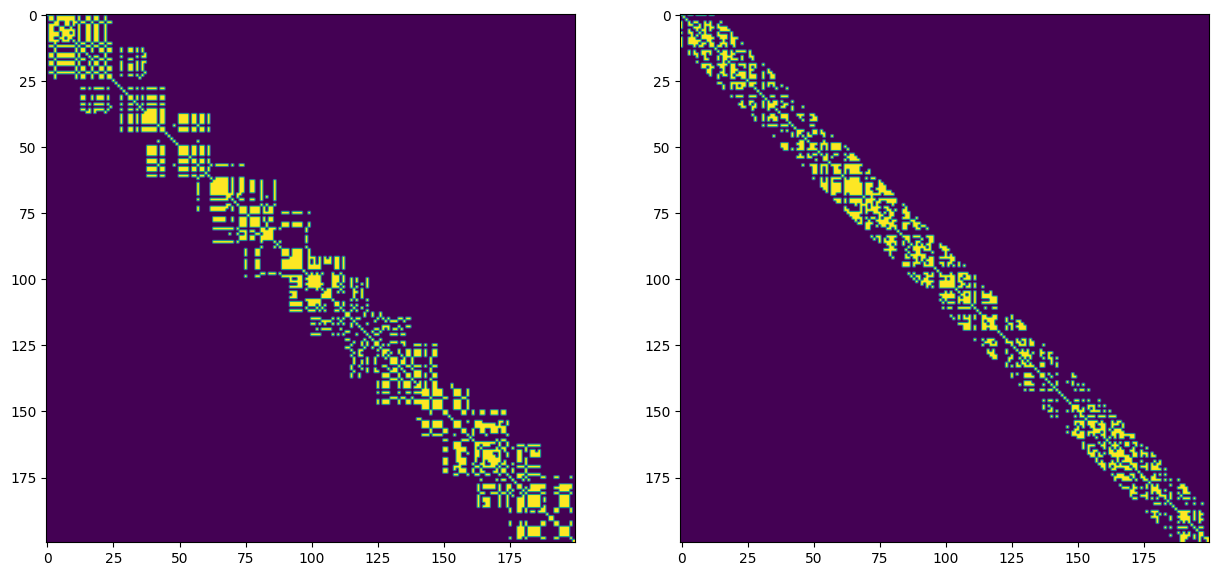

In [51]:
import matplotlib.pyplot as plt
def diag_block_mat_slicing(L):
    shp = L[0].shape
    N = len(L)
    r = range(N)
    out = np.zeros((N,shp[0],N,shp[1]),dtype=int)
    out[r,:,r,:] = L
    return out.reshape(np.asarray(shp)*N)

corrected = final_score.toarray()[:200, :200]
corrected = np.where(corrected <= 0, 0, 1)


fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(corrected)
ax[1].imshow(np.where(cov<=0, 0, 1))

print((cov[:10,:10]>0).sum()/(100), (corrected[10,10]>0).sum()/(100), )

0.3375 0.47


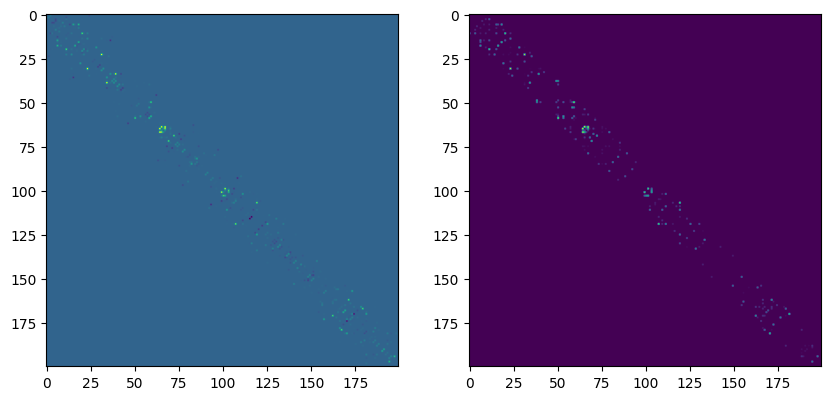

In [52]:
def diag_block_mat_slicing(L):
    shp = L[0].shape
    N = len(L)
    r = range(N)
    out = np.zeros((N,shp[0],N,shp[1]),dtype=int)
    out[r,:,r,:] = L
    return out.reshape(np.asarray(shp)*N)

corrected = final_score.toarray()[:200, :200]
corrected = np.where(corrected <= 0, corrected, corrected)
corrected = corrected - np.diag(corrected)*np.eye(len(cov))

cov_ = cov - np.diag(cov)*np.eye(len(cov))

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(corrected)
ax[1].imshow(np.where(cov_<=0, cov_, cov_))


print((cov_[:20,:20]>0).sum()/(400), (corrected[:20,:20]>0).sum()/(400), )

In [42]:
def diag_block_mat_slicing(L):
    shp = L[0].shape
    N = len(L)
    r = range(N)
    out = np.zeros((N,shp[0],N,shp[1]),dtype=int)
    out[r,:,r,:] = L
    return out.reshape(np.asarray(shp)*N)

corrected = final_score.toarray()[:200, :200]
corrected = np.where(corrected <= 0, corrected, corrected)
corrected = corrected - np.diag(corrected)*np.eye(len(cov))

sample_cov = sample_X_cov.toarray()[:200, :200]+sample_X_cov.toarray().T[:200,:200]
sample_cov = np.where(sample_cov <= 0, sample_cov, sample_cov)

fig, ax = plt.subplots(1, 3, figsize=(30,30))
ax[0].imshow(corrected)
ax[1].imshow(np.where(cov<=0, cov, cov))
ax[2].imshow(sample_cov)

print((cov[:20,:20]>0).sum()/(400), (sample_cov[:20,:20]>0).sum()/(400), (corrected[:20,:20]>0).sum()/(400), )

NameError: name 'sample_X_cov' is not defined

In [189]:
(potential_connections_X_atac['chr0'][0]==0).sum()

20

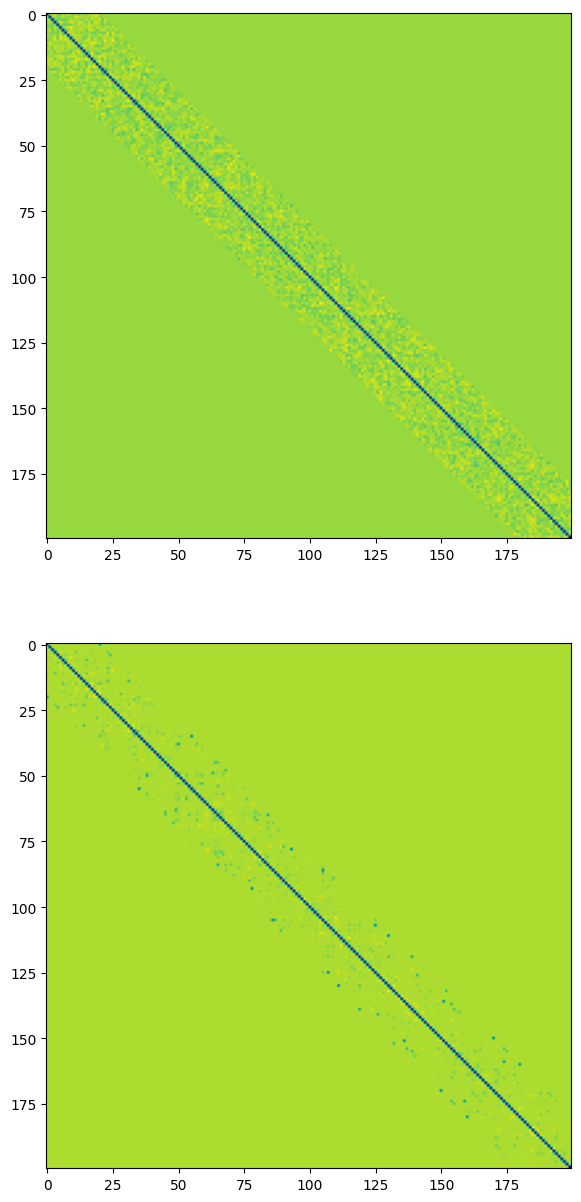

In [191]:
fig, ax = plt.subplots(2, figsize = (15, 15))
ax[0].imshow(sample_cov-cov),
ax[1].imshow(corrected-cov)

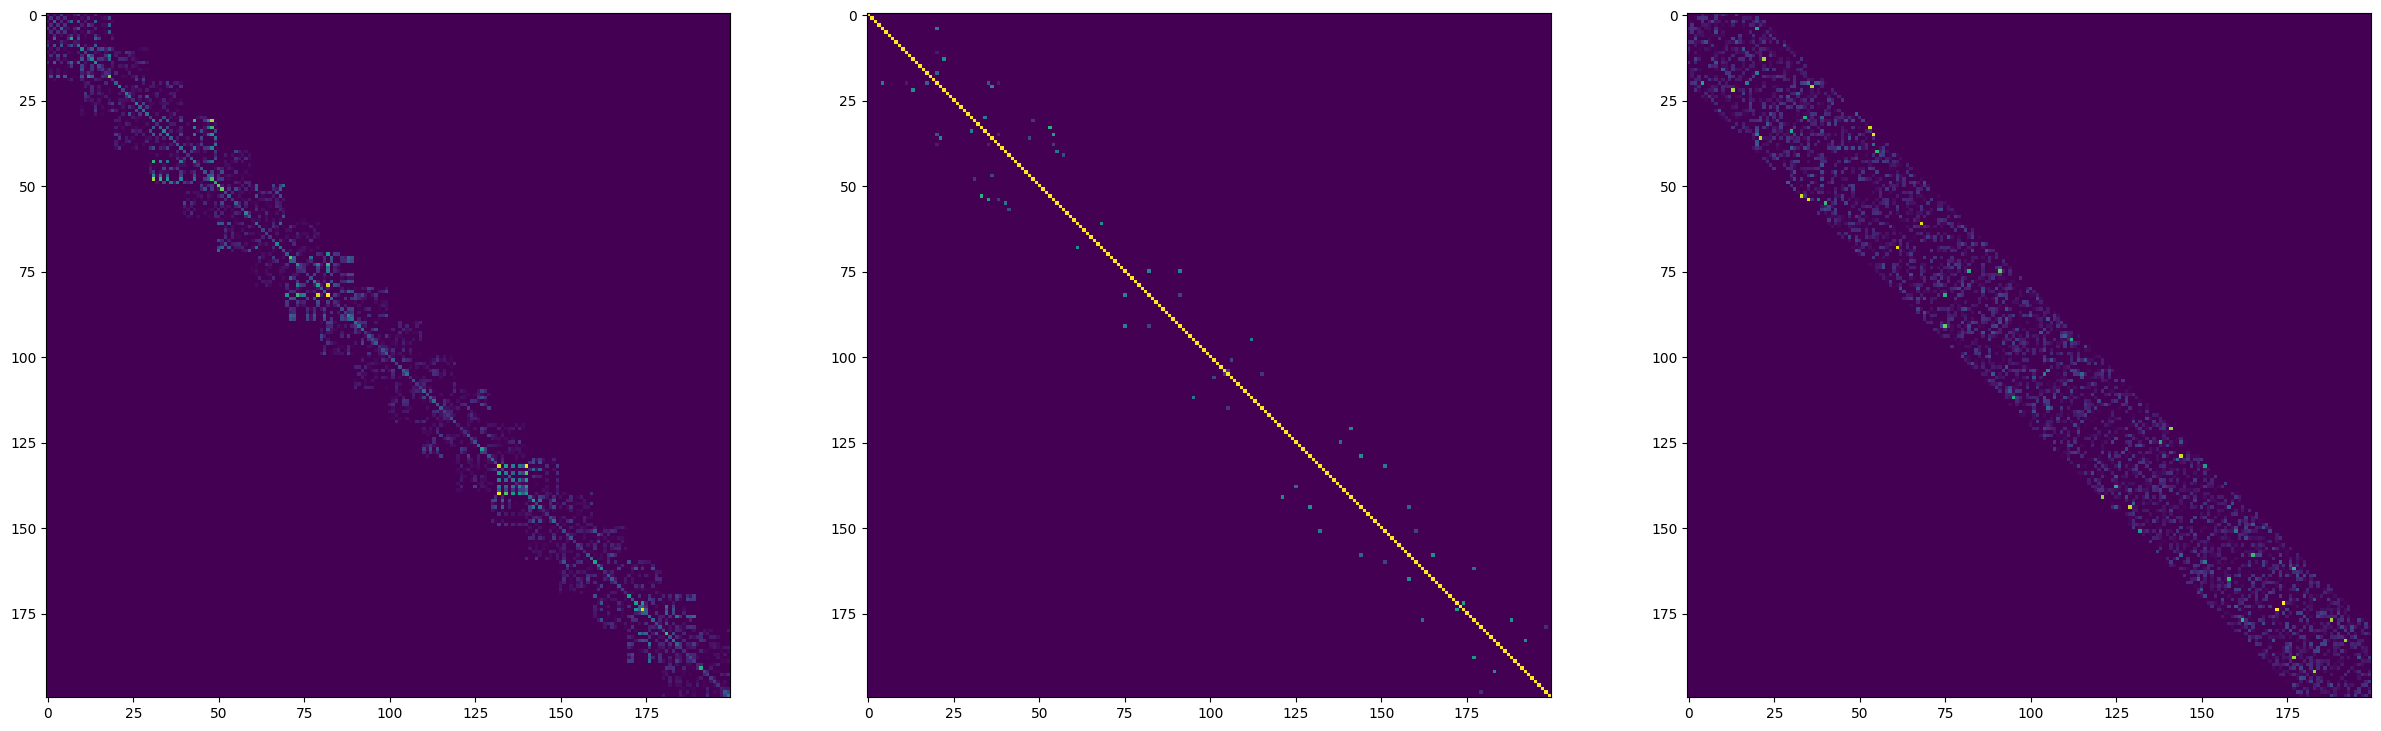

In [295]:
def diag_block_mat_slicing(L):
    shp = L[0].shape
    N = len(L)
    r = range(N)
    out = np.zeros((N,shp[0],N,shp[1]),dtype=int)
    out[r,:,r,:] = L
    return out.reshape(np.asarray(shp)*N)

corrected = final_score.toarray()[:200, :200]
corrected = np.where(corrected < 0, 0, corrected)

sample_cov = sample_X_cov.toarray()[:200, :200]+sample_X_cov.toarray().T[:200,:200]
sample_cov = np.where(sample_cov < 0, 0, sample_cov)

fig, ax = plt.subplots(1, 3, figsize=(30,30))
ax[0].imshow(corrected)
ax[1].imshow(np.where(cov>0, cov, 0))
ax[2].imshow(sample_cov)

In [222]:
pd.DataFrame(sp.sparse.csr_matrix(final_score)[:50,:50].toarray())

0         1         2         3         4         5         6    
0   0.295548  0.129715  0.021818 -0.199388  0.195276  0.193895 -0.222608  \
1   0.129715  0.190556 -0.040888 -0.126808  0.048674  0.159168 -0.084061   
2   0.021818 -0.040888  0.398433  0.126636  0.158108 -0.110534  0.008776   
3  -0.199388 -0.126808  0.126636  0.547753 -0.013682 -0.370198  0.445162   
4   0.195276  0.048674  0.158108 -0.013682  0.256595  0.062204 -0.081112   
5   0.193895  0.159168 -0.110534 -0.370198  0.062204  0.474136 -0.199447   
6  -0.222608 -0.084061  0.008776  0.445162 -0.081112 -0.199447  0.532819   
7   0.085860  0.131771  0.015081  0.011635  0.025158  0.038252  0.047995   
8   0.067174  0.174368 -0.169842 -0.210857 -0.048416  0.180539 -0.098003   
9   0.049181  0.033770 -0.016988 -0.040557  0.070077  0.030635 -0.049337   
10  0.018835  0.066266 -0.011348  0.015517  0.005429  0.012889  0.056059   
11  0.167830  0.085405  0.028534 -0.257290  0.111354  0.345155 -0.168863   
12  0.129991  0.026484  0.160046 -0.139119  0.110319  0.093782 -0.142998   
13  0.040512  0.053324  0.030541  0.068259  0.069405 -0.031025  0.052202   
14 -0.019554 -0.126062  0.592157  0.274238  0.222102 -0.284075  0.072521   
15  0.124118  0.048879  0.075594 -0.092980  0.099081  0.150188 -0.085427   
16  0.103624 -0.006403  0.291097 -0.050515  0.129639 -0.087937 -0.195667   
17  0.118660  0.035645  0.232362 -0.045871  0.141809  0.098296 -0.092763   
18  0.145940  0.116721  0.140715 -0.111461  0.148832  0.182712 -0.072306   
19  0.022145  0.048312 -0.010784  0.013539  0.028962  0.037089  0.027035   
20 -0.056056  0.249028 -0.614345 -0.325861 -0.323533  0.249946 -0.040427   
21 -0.028307  0.018620  0.022348  0.033719  0.033166  0.007732  0.041255   
22  0.071513  0.001927  0.174378  0.037000  0.129232 -0.017666  0.029320   
23 -0.105387 -0.008414 -0.040526  0.005125 -0.108757 -0.007634  0.023075   
24  0.035780  0.151358 -0.079020  0.052556 -0.028534  0.065248  0.127172   
25 -0.016950 -0.015573  0.075961  0.153604  0.068177 -0.026645  0.148040   
26  0.156514  0.129136  0.186893 -0.073887  0.162551  0.070667 -0.088602   
27 -0.089904  0.056092 -0.169969  0.051064 -0.091853 -0.012736  0.064403   
28  0.056396  0.010893  0.327375  0.165158  0.177624 -0.146968  0.031556   
29  0.045945  0.014523  0.164943  0.081666  0.089010 -0.030218  0.020448   
30  0.083223  0.060285  0.135312 -0.037213  0.076515  0.020199 -0.109367   
31 -0.000776  0.029672 -0.110349  0.005472 -0.064214  0.030314  0.030953   
32  0.021617 -0.072113  0.494488  0.114578  0.207816 -0.218550 -0.074079   
33  0.232304  0.053491  0.209003 -0.364637  0.121251  0.124263 -0.465296   
34  0.078104  0.029407 -0.021930 -0.033471  0.015297  0.112726 -0.044017   
35 -0.290909 -0.165970 -0.226949  0.358475 -0.320161 -0.392214  0.330878   
36  0.014720  0.101038 -0.099592  0.010847 -0.008679  0.082053  0.076772   
37  0.117948  0.126830  0.048710 -0.080959  0.105930  0.159476 -0.035971   
38 -0.098856 -0.006628 -0.172378  0.091709 -0.090079  0.061239  0.206234   
39  0.146689  0.057160  0.117694  0.032104  0.148269  0.076099  0.019868   
40 -0.013971  0.018432 -0.270469 -0.044239 -0.078570  0.004206  0.009093   
41  0.084368  0.093796 -0.074981 -0.159091 -0.046628  0.075950 -0.169367   
42  0.103474  0.064105  0.253016 -0.004797  0.177157 -0.011300 -0.060566   
43  0.004868  0.093042 -0.224807 -0.084547 -0.093212  0.041068  0.007059   
44  0.044150  0.007057  0.080173  0.060241  0.090838  0.029406  0.020133   
45 -0.064022  0.139497 -0.223626  0.059833 -0.121818 -0.028942  0.133000   
46  0.021173  0.010538  0.052010  0.144911  0.031089 -0.047895  0.197834   
47  0.122706  0.061736  0.062300  0.068513  0.093164  0.046217  0.070545   
48  0.088208 -0.031875  0.347505  0.043110  0.180102 -0.072440 -0.048121   
49  0.117346  0.040296  0.149691  0.069363  0.107729  0.040994  0.034747   

          7         8         9   ...        40        41        42        43   
0   0.085860  0.067174  0.049181  ... -0.013971  0.0

In [206]:
pd.DataFrame(sp.sparse.csr_matrix(sample_X_cov)[:50,:50].toarray())

0         1         2         3         4         5         6         7    
0   0.0 -0.037216  0.056552 -0.086126  0.075158 -0.032491  0.078817  0.017631  \
1   0.0  0.000000  0.041677  0.067344  0.033272 -0.078063 -0.011656  0.007831   
2   0.0  0.000000  0.000000  0.013430  0.079137  0.036679 -0.023651 -0.052498   
3   0.0  0.000000  0.000000  0.000000  0.032055 -0.052708  0.018629 -0.033678   
4   0.0  0.000000  0.000000  0.000000  0.000000 -0.020934 -0.010503 -0.068083   
5   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.012346 -0.056760   
6   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -0.042970   
7   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
31  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
41  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
43  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
44  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
45  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
46  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
48  0.0  0.000000  0.000000  0.00000

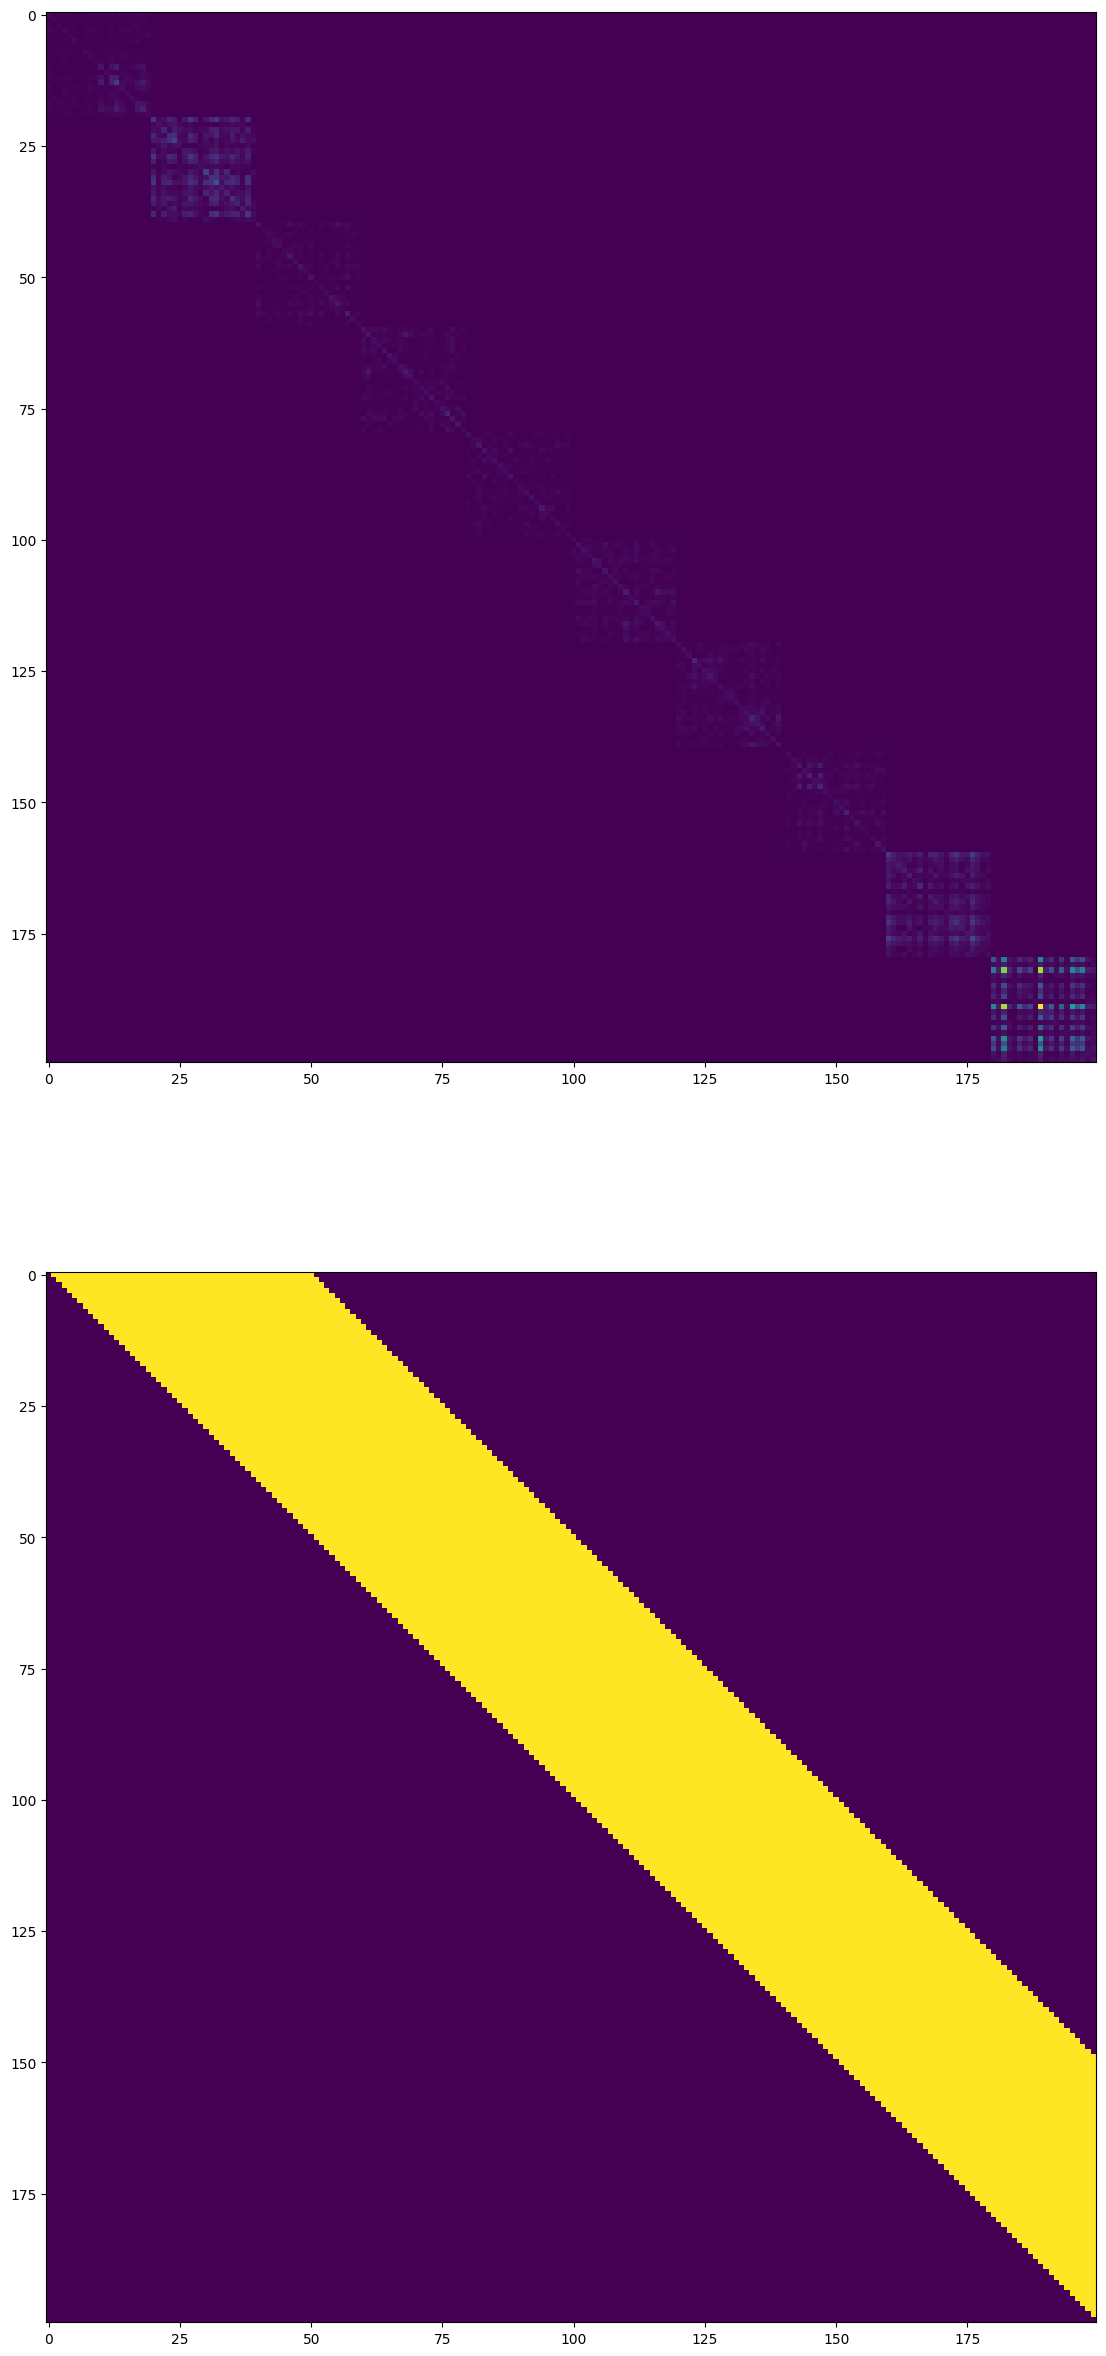

In [208]:
fig, ax = plt.subplots(2, figsize=(30,30))
ax[0].imshow(np.abs(final_score.toarray()[:200, :200]))
ax[1].imshow(np.abs(global_sparse(atac, potential_connections_X_atac).toarray()[:200, :200]))

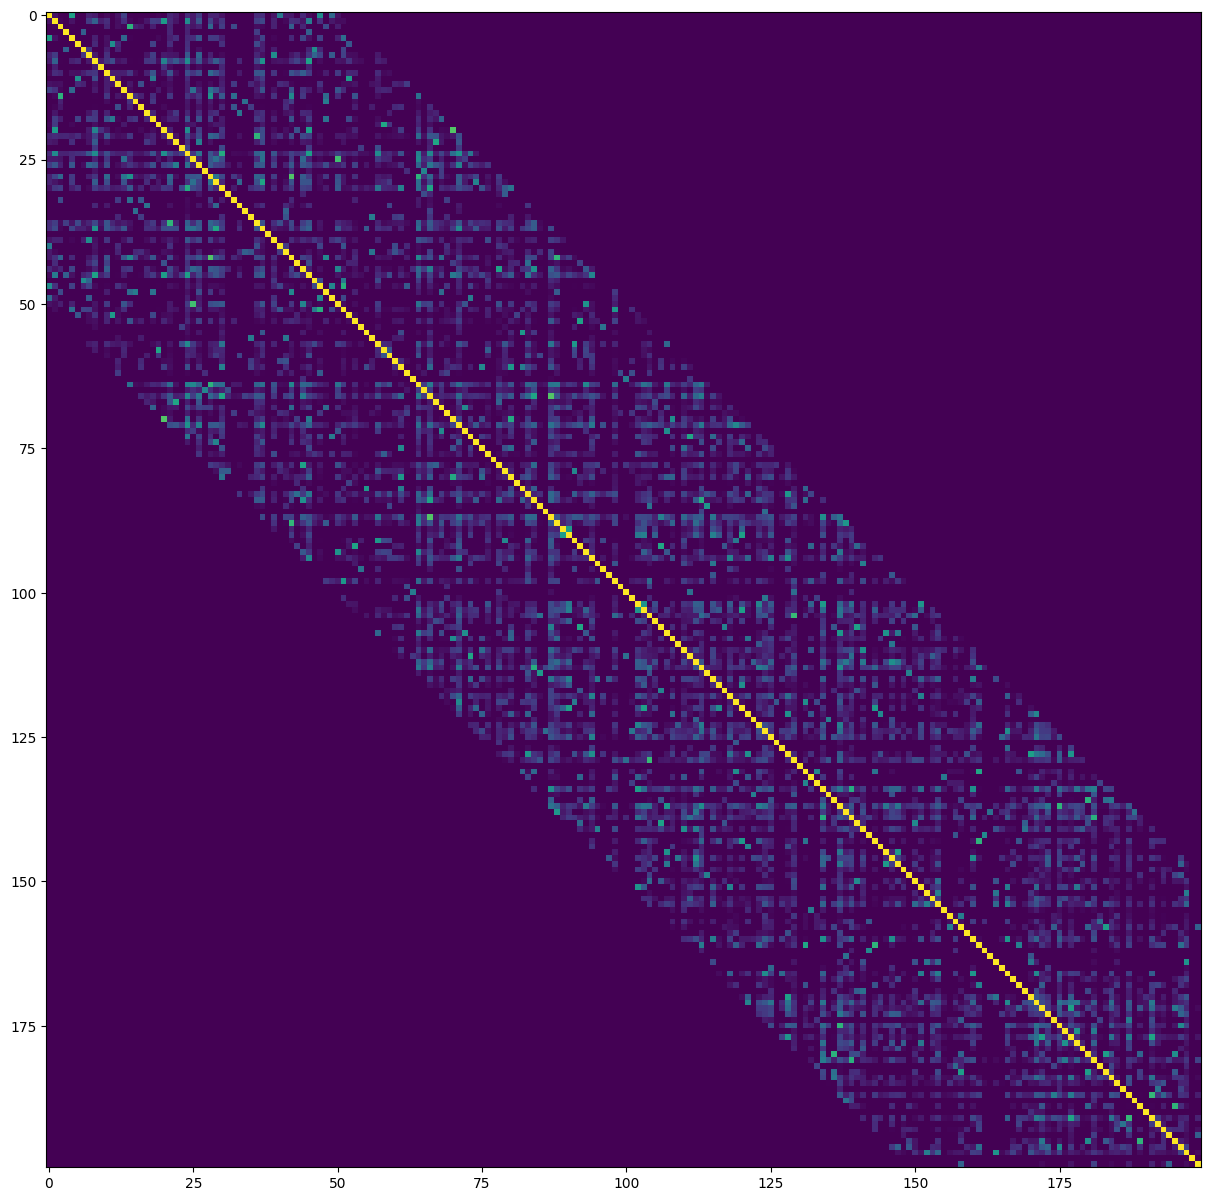

In [226]:
plt.subplots(1, figsize=(15,15))
def diag_block_mat_slicing(L):
    shp = L[0].shape
    N = len(L)
    r = range(N)
    out = np.zeros((N,shp[0],N,shp[1]),dtype=int)
    out[r,:,r,:] = L
    return out.reshape(np.asarray(shp)*N)
plt.imshow(cov)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cicero = pd.read_csv('../../../HuMMuS/mofa_hummus/multilayers/ML_hESC_Chen_GeneNW_10K_Peaks2Genes_UP0.5K_DOWN0.5K_nofilt_nofilt_TFlayer_nolinks/multiplex/layer_PEAKS/peak_edges.tsv', sep='\t', header=None).iloc[:50000,:]

In [5]:
cicero.index = pd.MultiIndex.from_arrays([cicero[0], cicero[1]])

In [6]:
cicero = cicero[2].unstack()

In [7]:
cicero = cicero.fillna(0).to_numpy()

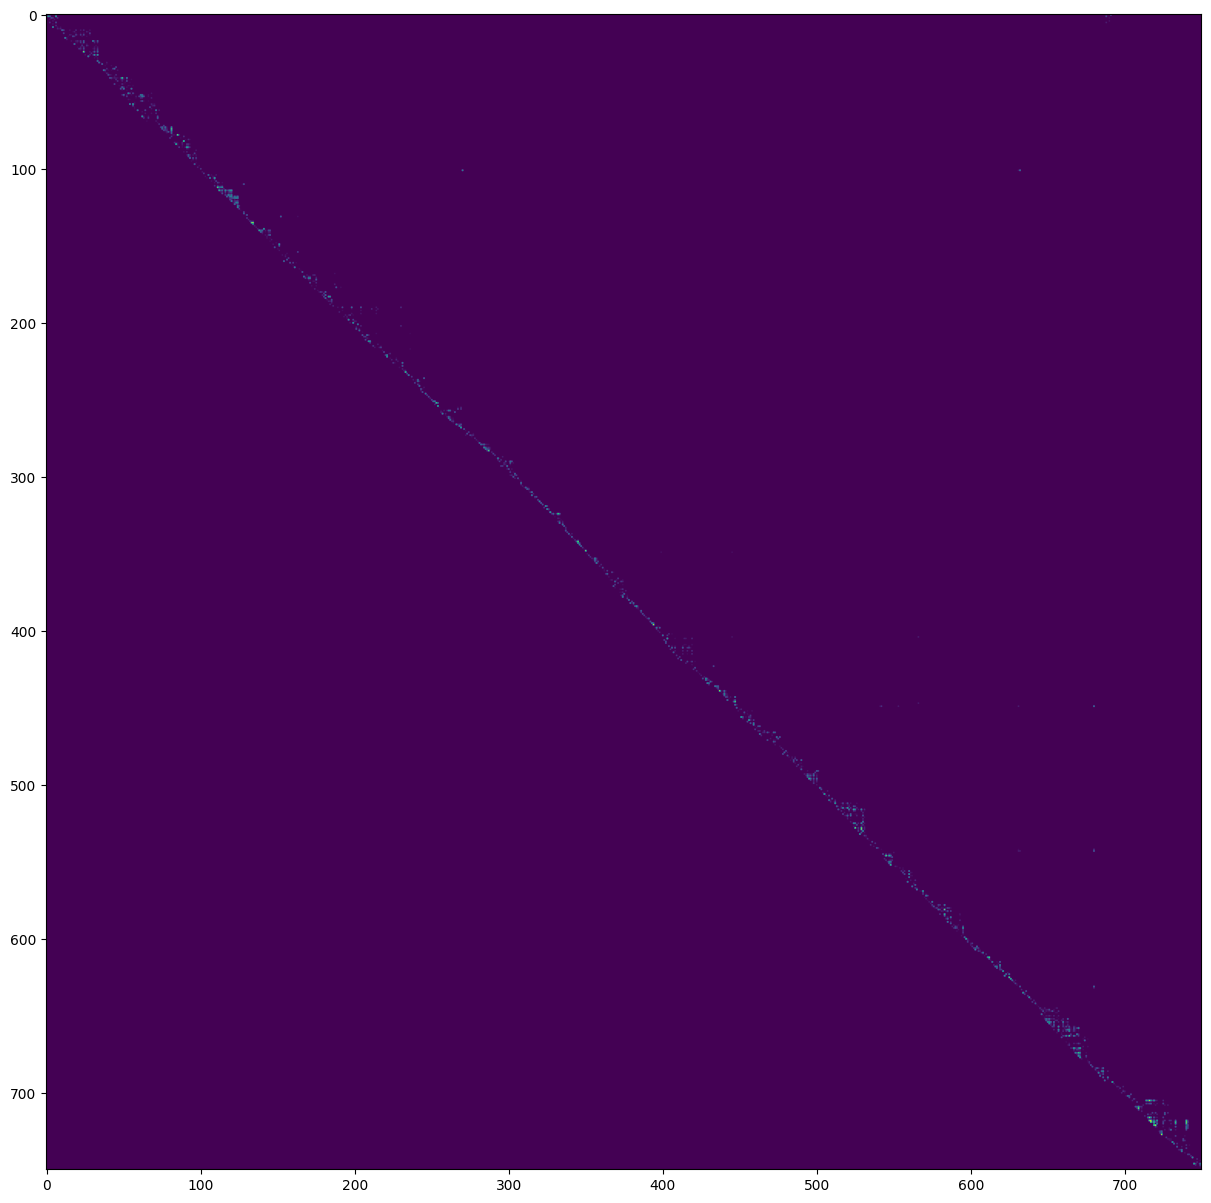

In [8]:
plt.subplots(1, figsize=(15,15))
plt.imshow(cicero[:750, :750])

In [148]:
sp.sparse.csr_matrix(sample_cov)[:50,:50].toarray()

array([[ 0.        , -0.00700442,  0.07900309, ..., -0.08658208,
        -0.02343908,  0.08069182],
       [ 0.        ,  0.        , -0.00190267, ..., -0.02205332,
        -0.04657126, -0.0043872 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00921396,
        -0.05257292,  0.00323809],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.14971947,  0.07366236],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.04317588],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [222]:
k = 300
graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(init_method='precomputed', lam=np.random.random(size = (k,k)))

In [223]:
sample_cov = sample_cov.toarray() + sample_cov.T.toarray()
#sample_cov = sample_cov - (np.diag(sample_cov) - 1e-4) * np.eye(sample_cov.shape[0])
sample_cov += 1e-4 * np.eye(sample_cov.shape[0])
results = graph_lasso_model.fit(sample_cov[:k,:k], tol=1e-6)

In [224]:
(results.covariance_ - np.diag(results.covariance_)*np.eye(len(results.covariance_))).sum()

-648.7245551044573

In [162]:
results = graph_lasso_model.fit(atac.X[:200,:30].T, tol=1e-2)

In [163]:
(results.covariance_ - np.diag(results.covariance_)*np.eye(len(results.covariance_))).sum()

2.1513101824912457

In [164]:
graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(init_method='precomputed', lam=0.5)

In [177]:
sample_cov

<2000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 87250 stored elements in COOrdinate format>

In [ ]:
(results.covariance_ - np.diag(results.covariance_)*np.eye(len(results.covariance_))).sum()
#results.covariance_.shape

In [138]:
cov = np.corrcoef(atac.X[:200,:30])
cov = cov - (np.eye(len(cov))/np.diag(cov) - 1)

In [139]:
np.max(cov)

1.7231138584847492

In [13]:
from scipy.sparse import issparse

In [14]:
issparse(sample_cov)

True

In [21]:
np.max(np.abs(sample_cov.data))

249.13752508361202

In [297]:
sparse = sp.sparse.coo_matrix(sample_cov)

In [294]:
sparse = sp.sparse.csr_matrix(sparse)

In [296]:
sparse[:5,:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [298]:
blop = np.where(sparse.data>0)

In [299]:
blop2 = np.where(sparse.data>0)

In [310]:
pos_mask1 = np.where(sparse.data>0)
pos_idx1 = sparse.row[pos_mask1]
pos_idy1 = sparse.col[pos_mask1]

In [315]:
s1 = sparse
s2 = sparse

In [357]:
s1.data

array([ 1.00000000e-04,  2.86204013e+00, -7.87468896e+01, ...,
        2.99430881e+01,  2.67039576e+01,  1.00000000e-04])

In [368]:
pos_coord1 = {(x,y) for x,y,d in zip(s1.row, s1.col, s1.data) if d>=0}
pos_coord2 = {(x,y) for x,y,d in zip(s2.row, s2.col, s2.data) if d>=0}
pos_coord = pd.DataFrame(pos_coord1.intersection(pos_coord2), columns = ['row', 'col'])

neg_coord1 = {(x,y) for x,y,d in zip(s1.row, s1.col, s1.data) if d<=0}
neg_coord2 = {(x,y) for x,y,d in zip(s2.row, s2.col, s2.data) if d<=0}
neg_coord = pd.DataFrame(neg_coord1.intersection(neg_coord2), columns = ['row', 'col'])

In [370]:
pd.concat(neg_coord , pos_coord)

TypeError: concat() takes 1 positional argument but 2 were given

In [333]:
common = {}
common['row'] = np.array(bb)[:,0]
common['col'] = np.array(bb)[:,0]

array([1426, 1025, 1467, ..., 1625,  229,  934], dtype=int32)

In [352]:
sp.sparse.csr_matrix(s1)[(s1 + s2) > 0]

matrix([[1.00000000e-04, 2.86204013e+00, 6.95003344e+00, ...,
         2.99430881e+01, 2.67039576e+01, 1.00000000e-04]])

In [348]:
type(s1.multiply(s2))

scipy.sparse._csr.csr_matrix

In [317]:
import tqdm

[True if c1 in coord2 else False for c1 in tqdm.tqdm(coord1)]
[True if c2 in coord1 else False for c2 in tqdm.tqdm(coord2)]


KeyboardInterrupt: 

In [287]:
sparse.__dict__

{'_shape': (2000, 2000),
 'maxprint': 50,
 'data': array([ 1.00000000e-04,  2.86204013e+00, -7.87468896e+01, ...,
         2.99430881e+01,  2.67039576e+01,  1.00000000e-04]),
 'indices': array([   0,    1,    2, ..., 1997, 1998, 1999], dtype=int32),
 'indptr': array([     0,     51,    103, ..., 176397, 176449, 176500], dtype=int32)}

In [283]:
sparse[:4,:5]

TypeError: 'coo_matrix' object is not subscriptable

In [262]:
#%%timeit
np.where(np.abs(sp.sparse.csr_matrix(sample_cov)) - np.abs(sp.sparse.csr_matrix(sample_cov) - sp.sparse.csr_matrix(sample_cov)).todense())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [260]:
np.array(d)

(array([   0,    0,    0, ..., 1999, 1999, 1999]),
 array([   0,    1,    2, ..., 1997, 1998, 1999]))